## Dataset : Titanic
[ https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv ]

# Data Visualization II
#### 1. Use the inbuilt dataset 'titanic' as used in the above problem. Plot a box plot for distribution of age with respect to each gender along with the information about whether they survived or not. (Column names : 'sex' and 'age') <br>2. Write observations on the inference from the above statistics.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df1 = df.copy()        # original copy
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("Titanic dataset :\nRows : " + str(df.shape[0]) + "\nColumns : " + str(df.shape[1]))

Titanic dataset :
Rows : 891
Columns : 12


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# Technical details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:



# checking for the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# replacing null values with its mean value
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [9]:
# dropping columns Ticket, Cabin, Embarked
df = df.drop(['Ticket', 'Cabin', 'Embarked'], axis = 1)

In [10]:
# therefore now no null values are present in dataframe
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [11]:
print("Now Dataset is reduced from", df1.shape, "to", df.shape, ".")

Now Dataset is reduced from (891, 12) to (891, 9) .


In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Boxplot

<AxesSubplot:xlabel='Sex', ylabel='Age'>

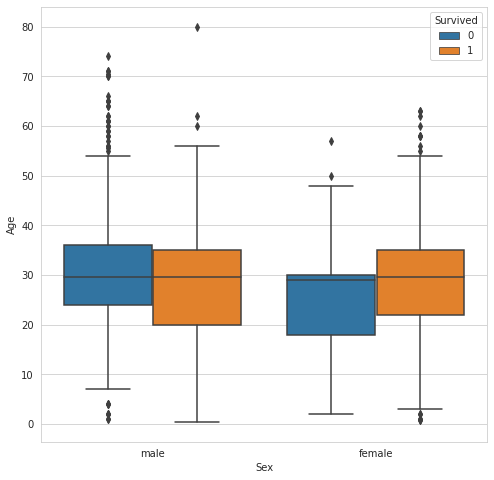

In [13]:
plt.rcParams['figure.figsize'] = (8, 8)
sns.boxplot(x='Sex', y='Age', data=df, hue='Survived')

[Text(0, 0, '27.6317'), Text(0, 0, '28.9793')]

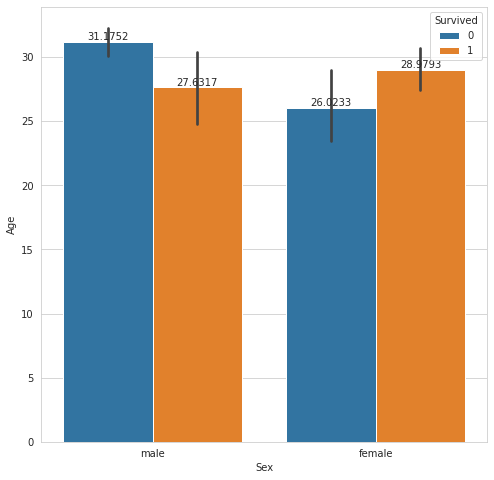

In [14]:
ax = sns.barplot(x='Sex', y='Age', data=df, hue='Survived')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

### Observations : 
##### Male : <br>The range of age for male passenger survival is 20-36yrs with median age value 27.6317yrs ~ 28yrs.<br>Whereas the range of age for male passenger died is 24-38yrs with median age value 31.1752yrs ~ 31yrs.
##### Female : <br>The range of age for female passenger survival is 21-36yrs with median age value 28.9793yrs ~ 29yrs.<br>Whereas the range of age for female passenger died is 19-30yrs with median age value slightly less than 26.0233yrs ~ 26yrs.
##### Therefore, we can conclude that the median value for survival age is nearly similar. But actually here, the survival is independent of the age of the passenger because the passengers who died also have the similar value for the median age. <br> From the graph , we come to know that No. of female who survived is greater than no. of male.